<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, Dropout, Activation
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Collecting Images from ImageNet

In [2]:
def url_to_image(url):
  #Open the URL
	webpage = urllib.request.urlopen(url)
 
  #Read the image from the URL
	image = np.asarray(bytearray(webpage.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image

In [3]:
def get_images(url, n_train, n_valid, n_test, path1, path2, path3):

  #Getting the image links and splitting them after converting to sting
  page = requests.get(url)
  print(page.content)
  soup = BeautifulSoup(page.content, 'html.parser')
  str_soup = str(soup)

  urls = str_soup.split('\r\n')
  print('No. of URLs is:', len(urls))

  #Saving The Train Data
  i, count = 0, 0
  while 1:
    if count % 10 == 0: print('Train: ', count)

    if not urls[i] == None:
      try:
        img = url_to_image(urls[i])
        if (len(img.shape))==3:
          save_path = path1+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    i += 1
    if count >= n_train: break
  
  #Saving The Valid Data
  j, count = i, 0 
  while 1:
    if count % 10 == 0: print('Valid: ', count)

    if not urls[j] == None:
      try:
        img = url_to_image(urls[j])
        if (len(img.shape))==3:
          save_path = path2+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    j += 1
    if count >= n_valid: break

  #Saving The Test Data
  k, count = j, 0 
  while 1:
    if count % 10 == 0: print('Test: ', count)

    if not urls[k] == None:
      try:
        img = url_to_image(urls[k])
        if (len(img.shape))==3:
          save_path = path3+str(count)+'.jpg'
          cv2.imwrite(save_path, img)
          count += 1
      except:
        None
    
    k += 1
    if count >= n_test: break

Making Directories for each Classification Object

In [2]:
!mkdir /content/train
!mkdir /content/train/ind
!mkdir /content/train/afr
!mkdir /content/train/tusk

!mkdir /content/valid
!mkdir /content/valid/ind
!mkdir /content/valid/afr
!mkdir /content/valid/tusk

!mkdir /content/test
!mkdir /content/test/ind
!mkdir /content/test/afr
!mkdir /content/test/tusk

mkdir: cannot create directory ‘/content/train’: File exists
mkdir: cannot create directory ‘/content/train/ind’: File exists
mkdir: cannot create directory ‘/content/train/afr’: File exists
mkdir: cannot create directory ‘/content/train/tusk’: File exists
mkdir: cannot create directory ‘/content/valid’: File exists
mkdir: cannot create directory ‘/content/valid/ind’: File exists
mkdir: cannot create directory ‘/content/valid/afr’: File exists
mkdir: cannot create directory ‘/content/valid/tusk’: File exists
mkdir: cannot create directory ‘/content/test’: File exists
mkdir: cannot create directory ‘/content/test/ind’: File exists
mkdir: cannot create directory ‘/content/test/afr’: File exists
mkdir: cannot create directory ‘/content/test/tusk’: File exists


Saving The Indian Elephant Images

In [ ]:
ind = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013"
ind_train = '/content/train/ind/ind_train'
ind_val = '/content/valid/ind/ind_val'
ind_test = '/content/test/ind/ind_test'
get_images(ind, 90, 30, 30, ind_train, ind_val, ind_test)

Saving The African Elephant Images

In [ ]:
afr = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458"
afr_train = '/content/train/afr/afr_train'
afr_val = '/content/valid/afr/afr_val'
afr_test = '/content/test/afr/afr_test'
get_images(afr, 90, 30, 30, afr_train, afr_val, afr_test)

Saving Elephant Images with Tuskers

In [ ]:
tusk = "http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265"
tusk_train = '/content/train/tusk/tusk_train'
tusk_val = '/content/valid/tusk/tusk_val'
tusk_test = '/content/test/tusk/tusk_test'
get_images(tusk, 90, 30, 30, tusk_train, tusk_val, tusk_test)

Applying Data Augmentation using ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range = 60, vertical_flip = True, 
                                   horizontal_flip = True, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   fill_mode = 'nearest', zoom_range = 0.1)

val_datagen = ImageDataGenerator(rescale = 1.0/255, rotation_range = 60, vertical_flip = True, 
                                   horizontal_flip = True, width_shift_range = 0.2, height_shift_range = 0.2, 
                                   fill_mode = 'nearest', zoom_range = 0.1)

test_datagen = ImageDataGenerator(rescale = 1.0/255)

train = train_datagen.flow_from_directory(directory = '/content/train/', target_size = (150, 150), 
                                          class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

valid = val_datagen.flow_from_directory(directory = '/content/valid/', target_size = (150, 150), 
                                          class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

test = test_datagen.flow_from_directory(directory = '/content/test/', target_size = (150, 150), 
                                        class_mode = 'categorical', shuffle = True, color_mode = 'rgb', batch_size = 5)

Found 270 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


# Model Building and Implementation

Building a CNN model

In [4]:
model = Sequential()

'''First Layer - 1024 Units'''
model.add(Conv2D(270, (150,150), input_shape= (150, 150, 3), kernel_initializer="glorot_normal", bias_initializer="glorot_normal", 
                 activation = 'relu'))
# model.add(Conv2D(8, kernel_size = (150, 150), activation = 'relu'))
# padding="valid", 
model.add(Flatten())
#model.add(BatchNormalization())
# model.add(Dropout(0.3))

'''Second Layer - 512 Units'''
model.add(Dense(units = 256, kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))
model.add(keras.layers.LeakyReLU(alpha = 0.01))
#model.add(BatchNormalization())
# model.add(Dropout(0.2))

'''Third Layer - 256 Units'''
model.add(Dense(units = 256, activation = 'relu', kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))
model.add(keras.layers.LeakyReLU(alpha = 0.01))

'''Fourth Layer - 128 Units'''
model.add(Dense(units = 256, activation = 'relu', kernel_initializer="glorot_normal", bias_initializer="glorot_normal"))

'''Output Layer - 3 Units'''
model.add(Dense(units = 3, activation = 'softmax', kernel_initializer = "glorot_normal", bias_initializer = "glorot_normal"))

'''Compiling Final Model'''
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 1, 270)         18225270  
_________________________________________________________________
flatten (Flatten)            (None, 270)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               69376     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6

In [5]:
filepath = "weights-best.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20, min_delta = 0.25, baseline=0.9)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2, factor=0.1, min_lr=0.00001)

history = model.fit(train, epochs=100, callbacks=[checkpoint, es], steps_per_epoch = 54, validation_data = valid)

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 1.2237 - accuracy: 0.3407
Epoch 00001: val_accuracy improved from -inf to 0.35556, saving model to weights-best.hdf5
54/54 [==============================] - 4s 74ms/step - loss: 1.2237 - accuracy: 0.3407 - val_loss: 1.1027 - val_accuracy: 0.3556
Epoch 2/100
54/54 [==============================] - ETA: 0s - loss: 1.1342 - accuracy: 0.3296
Epoch 00002: val_accuracy did not improve from 0.35556
54/54 [==============================] - 4s 73ms/step - loss: 1.1342 - accuracy: 0.3296 - val_loss: 1.0894 - val_accuracy: 0.3556
Epoch 3/100
54/54 [==============================] - ETA: 0s - loss: 1.1079 - accuracy: 0.3667
Epoch 00003: val_accuracy did not improve from 0.35556
54/54 [==============================] - 4s 70ms/step - loss: 1.1079 - accuracy: 0.3667 - val_loss: 1.1144 - val_accuracy: 0.3333
Epoch 4/100
54/54 [==============================] - ETA: 0s - loss: 1.1137 - accuracy: 0.3259
Epoch 00004: val_accuracy did

Plotting the results

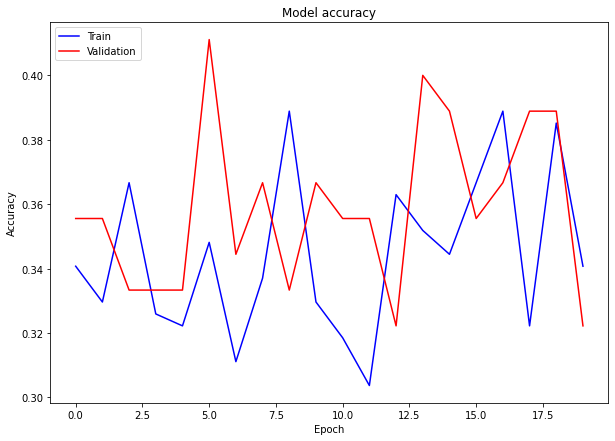

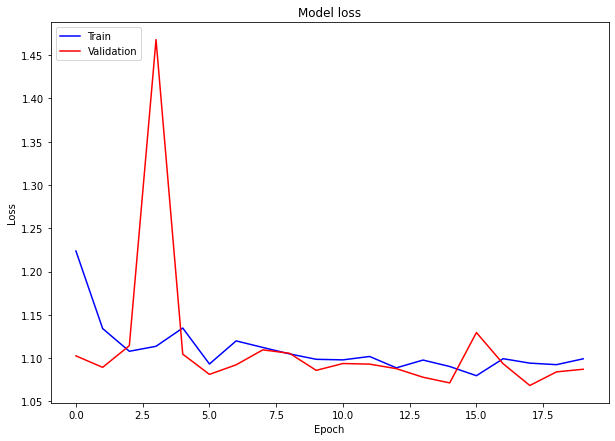

In [6]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'], color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
  
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')
#plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Implementing best model

In [7]:
best = load_model('weights-best.hdf5')
best.evaluate(test)[1]

18/18 [==============================] - 0s 27ms/step - loss: 1.1034 - accuracy: 0.3778


0.3777777850627899